In [193]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.linalg import eigh


Basic steps for implementing Spectral clustering:
1.Importing a comma-separated edge list.
2.Converting the edge list to an adjacency matrix.
3.Calculating eigenvalues and eigenvectors.
4.Using the Fiedler vector to partition the graph into two communities.
5.Using the K-eigenvector algorithm for partitioning into more than two communities.
6.Visualizing the results for nested clusters and multiple communities.

The provided code snippet uses NetworkX's `read_edgelist` or `read_weighted_edgelist` functions to load the graph. This indicates that the input graph files (`example1.dat` and `example2.dat`) are edge lists, where each row specifies an edge (and possibly weights).

In [185]:
def load_graph(path, weighted=False):
    if weighted:
        return nx.read_weighted_edgelist(path, delimiter=',', nodetype=int)
    else:
        return nx.read_edgelist(path, delimiter=',', nodetype=int)

Following the algorithm described in the paper, the core steps are:
1. **Construct the Laplacian Matrix**:
   For unweighted graphs, use the standard graph Laplacian L = D - A, where D is the degree matrix and A is the adjacency matrix.
   For weighted graphs, using Normalized Laplacian L = D^{-1/2} A D^{-1/2} .

   * Standard Laplacian is straightforward and suitable for graphs with uniform degree distributions.
   * Normalized Laplacian is better for handling graphs with varying degree distributions, as it normalizes the node influence.

2. **Compute the Top k Eigenvectors**:
   - Extract the k largest eigenvectors of L, where k is the desired number of clusters.

3. **Cluster Rows of Eigenvector Matrix**:
   - Use K-means clustering on the rows of the eigenvector matrix.

In [186]:
def spectral_clustering(graph, k, method='normalized'):
    A = nx.to_numpy_array(graph)  # Compute the adjacency matrix
    D = np.diag(np.sum(A, axis=1))  # # Degree matrix

    if method == 'standard':
        L = D - A  # standard laplacian
    elif method == 'normalized':
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
        L = np.identity(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt  # normalized laplacian
    else:
        raise ValueError("Unsupported method. Use 'standard' or 'normalized'.")

    # Compute the first k eigenvectors of L
    eigvals, eigvecs = np.linalg.eigh(L)  # 拉普拉斯矩阵的特征分解

    # choose k egeinvector
    X = eigvecs[:, :k]

    # Normalize the eigenvectors
    if method == 'normalized':
        X = X / np.linalg.norm(X, axis=1, keepdims=True)

    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    return A, D, L, labels, eigvals,eigvecs


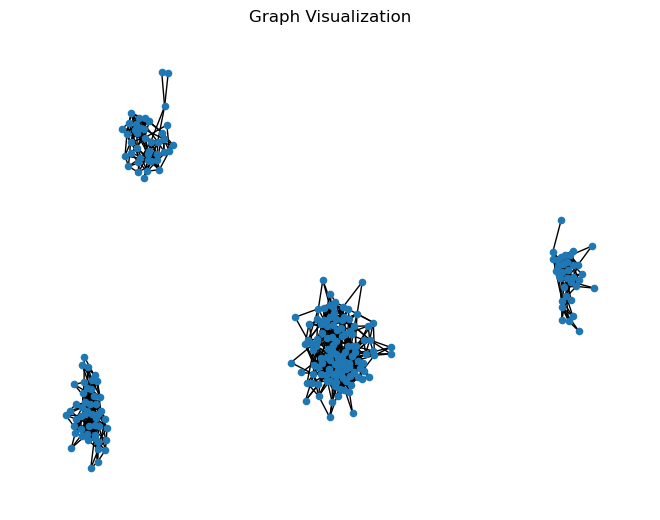

In [187]:
graph = load_graph("example1.dat", weighted=False)
nx.draw(graph, with_labels=False, node_size=20)
plt.title("Graph Visualization")
plt.show()

1.Using standard laplacian to show the spectral Clustering result

2.Showing the sorted values of the Fiedler vector (the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix). This visualization can reveal communities or clusters within the graph, as nodes in the same community often have similar values in the Fiedler vector.

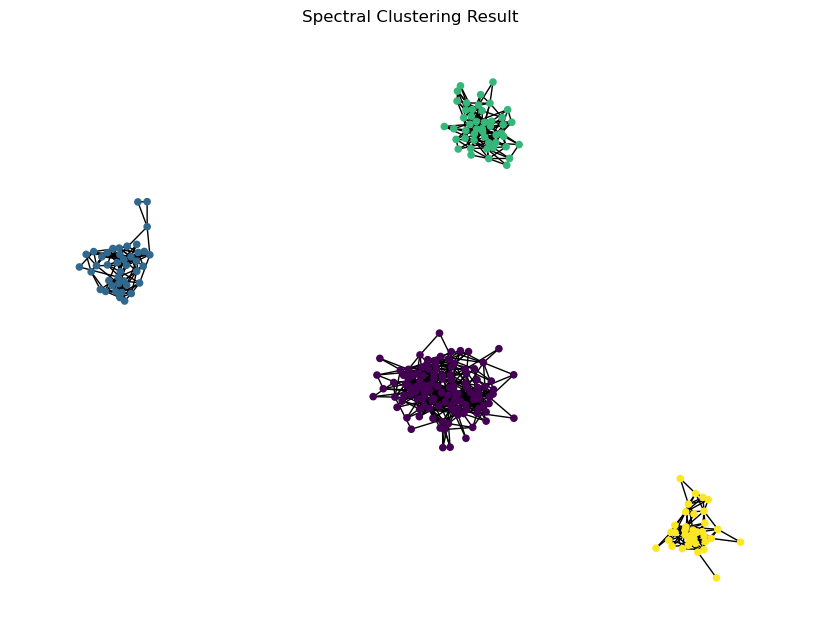

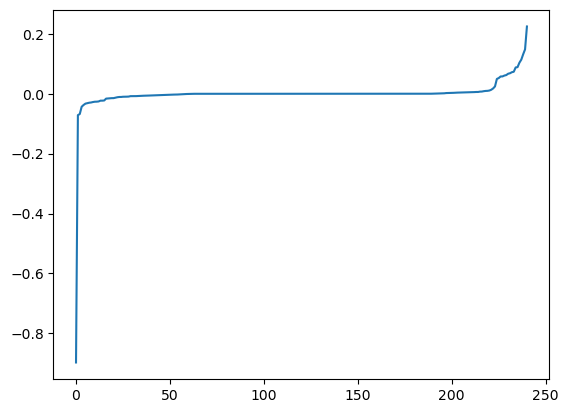

In [188]:
k = 4
# standard
A, D, L,labels, eigvals,eigvecs = spectral_clustering(graph, k, method='standard')

pos = nx.spring_layout(graph)
plt.figure(figsize=(8, 6))
nx.draw(graph,node_color=labels, node_size=20)
plt.title("Spectral Clustering Result")
plt.show()

np.argmax(np.abs(np.ediff1d(eigvals[::-1])))
values, vectors = np.linalg.eig(L)
plt.plot(np.sort(vectors[:, 1]))


 Sparsity Pattern 

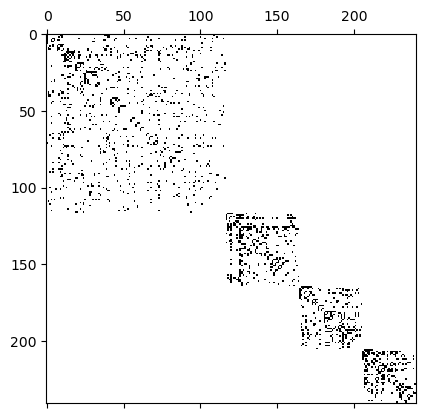

In [189]:
plt.spy(A)

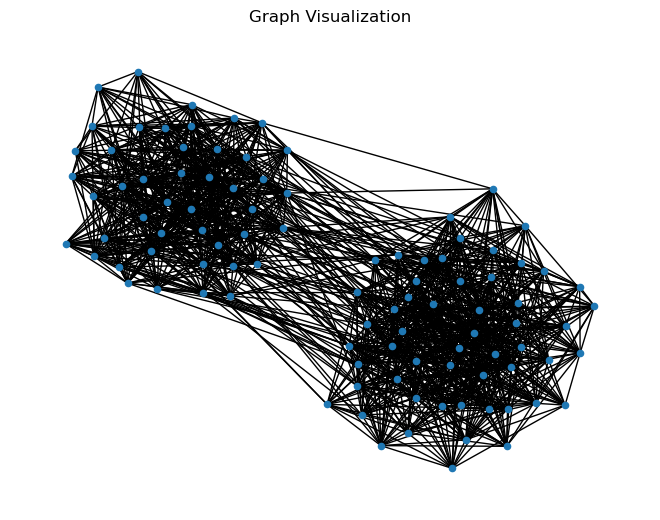

In [190]:
graph = load_graph("example2.dat", weighted=True)
nx.draw(graph, with_labels=False, node_size=20)
plt.title("Graph Visualization")
plt.show()


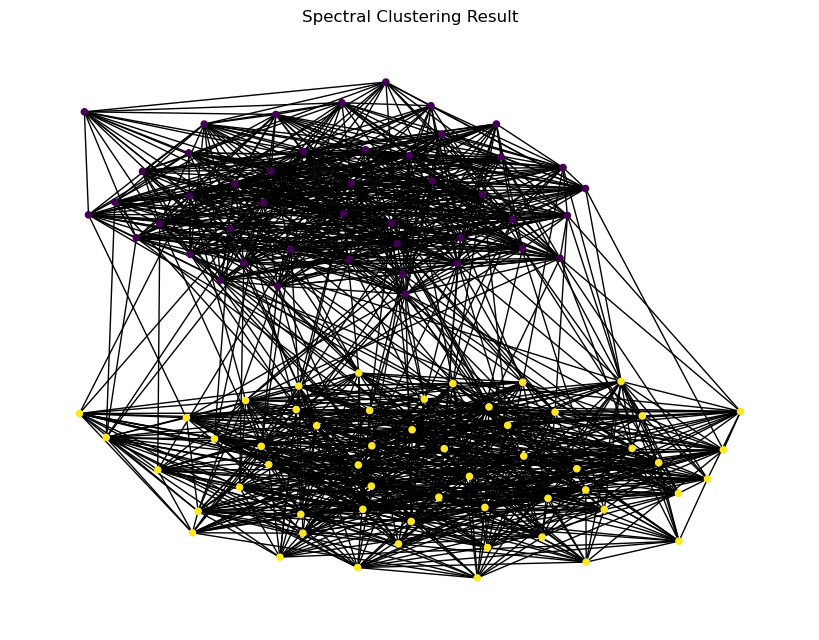

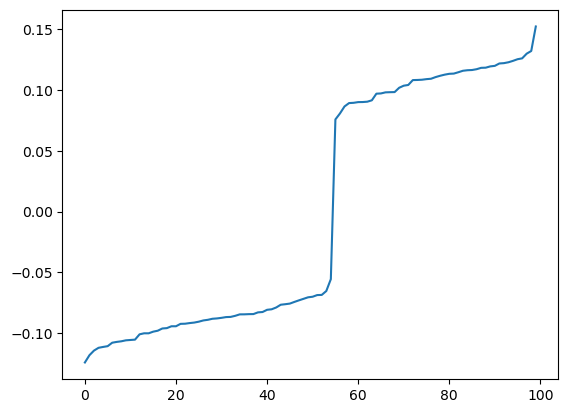

In [191]:
k = 2
# normalided
A, D, L, labels, eigvals,eigvecs = spectral_clustering(graph, k, method='normalized')

pos = nx.spring_layout(graph)
plt.figure(figsize=(8, 6))
nx.draw(graph,node_color=labels, node_size=20)
plt.title("Spectral Clustering Result")
plt.show()

np.argmax(np.abs(np.ediff1d(eigvals[::-1])))
values, vectors = np.linalg.eig(L)
plt.plot(np.sort(vectors[:, 1]))

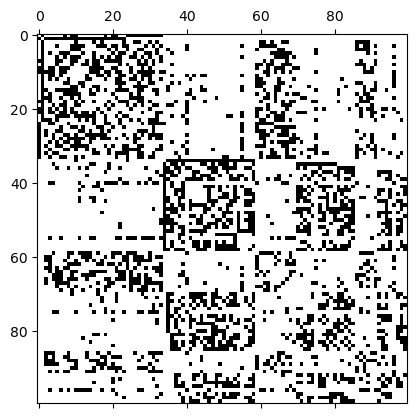

In [192]:
plt.spy(A);